<a href="https://www.kaggle.com/code/kursatdinc/flo-unsupervised-learning-customer-segmantation?scriptVersionId=188072675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Problem

FLO segments its customers and according to these segments marketing strategies. For this purpose customers' behavior will be defined and this groups will be formed according to clusters in behaviors.

# Dataset Story

The dataset includes OmniChannel (both online and offline shoppers) who made their last purchase from Flo in 2020 - 2021 information obtained from the past shopping behavior of customers.

**12 Variables, 19945 Observations**

* **master_id:** Unique customer number
* **order_channel:** Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile)
* **last_order_channel:** The channel where the last purchase was made
* **first_order_date:** Customer's first purchase date
* **last_order_date:** Customer's last purchase date
* **last_order_date_online:** The date of the customer's last online purchase
* **last_order_date_offline:** The date of the customer's last offline purchase
* **order_num_total_ever_online:** Total number of purchases made by the customer on the online platform
* **order_num_total_ever_offline:** Total number of purchases the customer made offline
* **customer_value_total_ever_offline:** Total price paid by the customer for offline purchases
* **customer_value_total_ever_online:** Total price paid by the customer for online purchases
* **interested_in_categories_12:** List of categories the customer shopped in the last 12 months

# Importings

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)

# Load Dataset

In [3]:
def load():
    df_ = pd.read_csv("/kaggle/input/flo-data/flo_data_20k.csv")

    return df_

df_ = load()
df = df_.copy()

df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.00,2.00,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.00,1.00,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.00,1.00,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.00,2.00,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.00,1.00,69.98,95.98,"[KADIN, AKTIFSPOR]"


# Overview & Preprocessing

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())

In [5]:
check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_

In [6]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

> Date columns converted to datetime object

In [8]:
today_date = df["last_order_date"].max() + dt.timedelta(days=2)

df["recency"] = (today_date - df["last_order_date"]).dt.days
df["tenure"] = (df["last_order_date"]-df["first_order_date"]).dt.days

In [9]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],95,119
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",186,366
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],86,582


> Recency & Tenure added to dataframe.

## Creating Model Dataframe 

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "date" not in col]

num_cols

Observations: 19945
Variables: 14
cat_cols: 2
num_cols: 10
cat_but_car: 2
num_but_cat: 0


['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'recency',
 'tenure']

> Since unsupervised learning algorithms are distance-based, I selected only numeric columns and created the model_df dataframe.

In [12]:
model_df = df[num_cols]

model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.00,1.00,139.99,799.38,95,119
1,19.00,2.00,159.97,1853.58,105,1469
2,3.00,2.00,189.97,395.35,186,366
3,1.00,1.00,39.99,81.98,135,11
4,1.00,1.00,49.99,159.99,86,582


## Model Standardization

### Skewness 

In [13]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.histplot(df_skew[column],bins=60)
    
    plt.text(0.95, 0.95, f"Skew: {skew:.2f}", 
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='black', alpha=0.7, pad=5))
    return

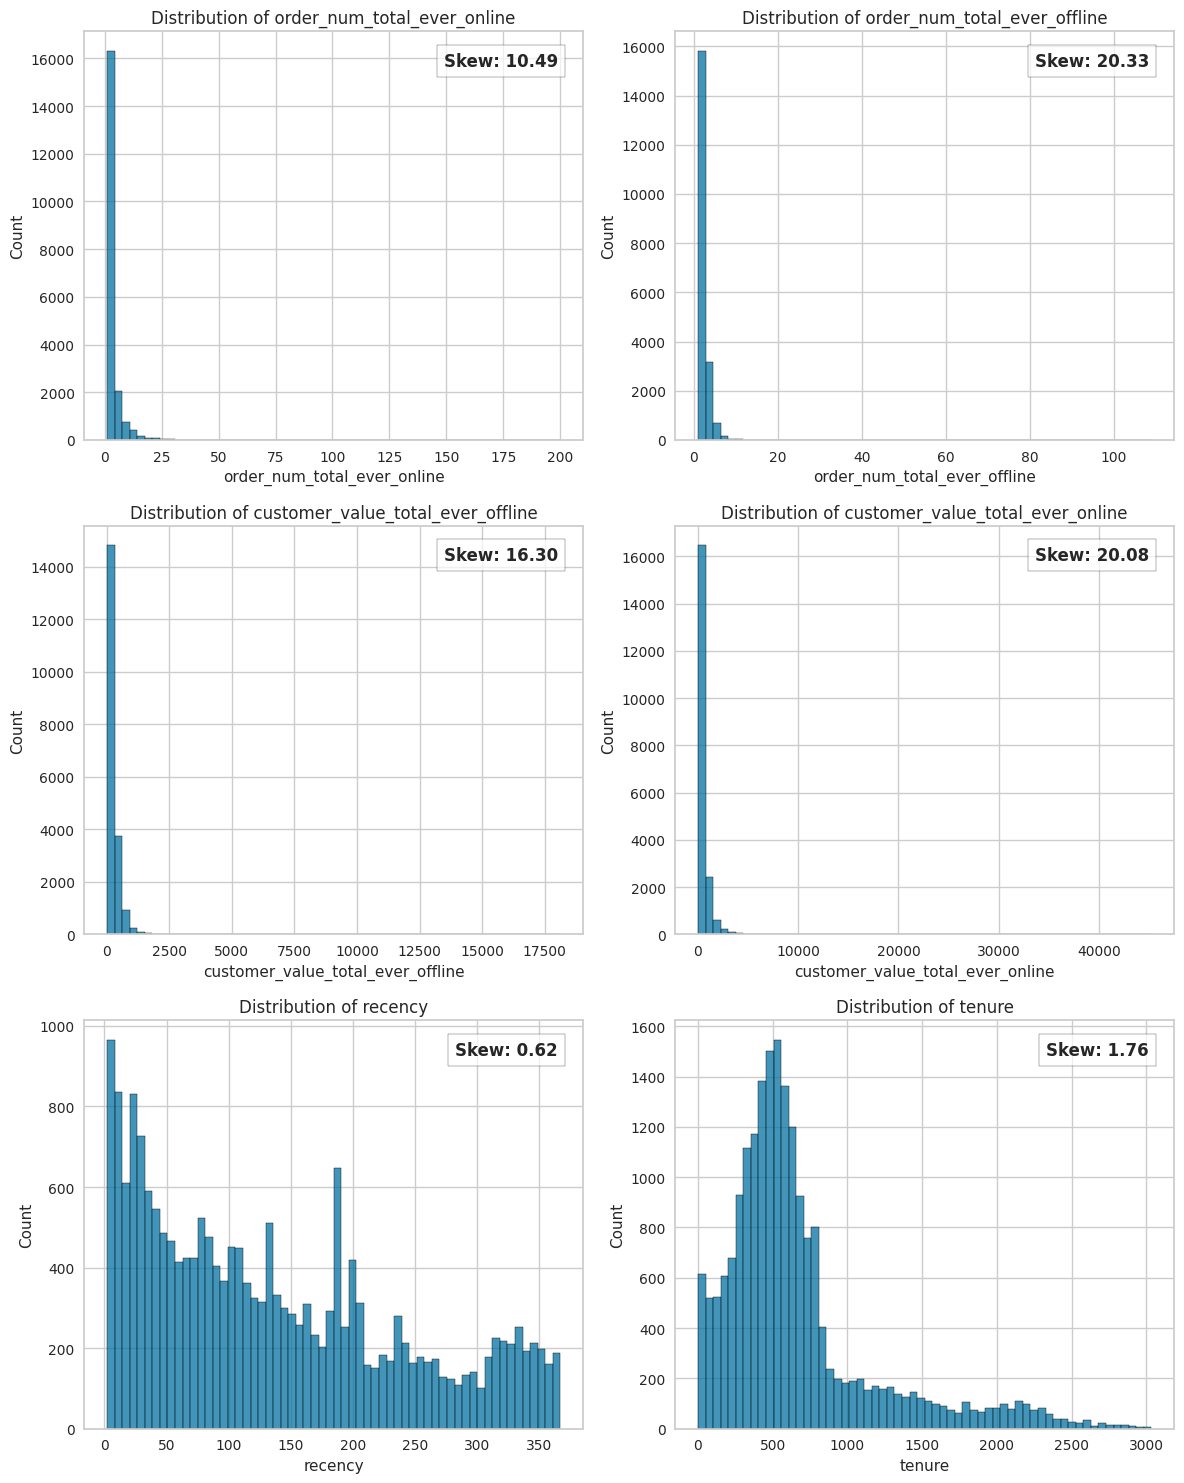

In [14]:
plt.figure(figsize=(12, 15))

for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    check_skew(model_df, column)
    
plt.tight_layout()
plt.show()

> Since all variables (except recency and tenure) are left-skewed, we need to log-transform them to approximate the normal distribution.

### Log-Transform

In [15]:
transform_cols = [col for col in model_df.columns if col not in ["recency", "tenure"]]
transform_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online']

In [16]:
for col in transform_cols:
    model_df[col] = np.log1p(model_df[col])

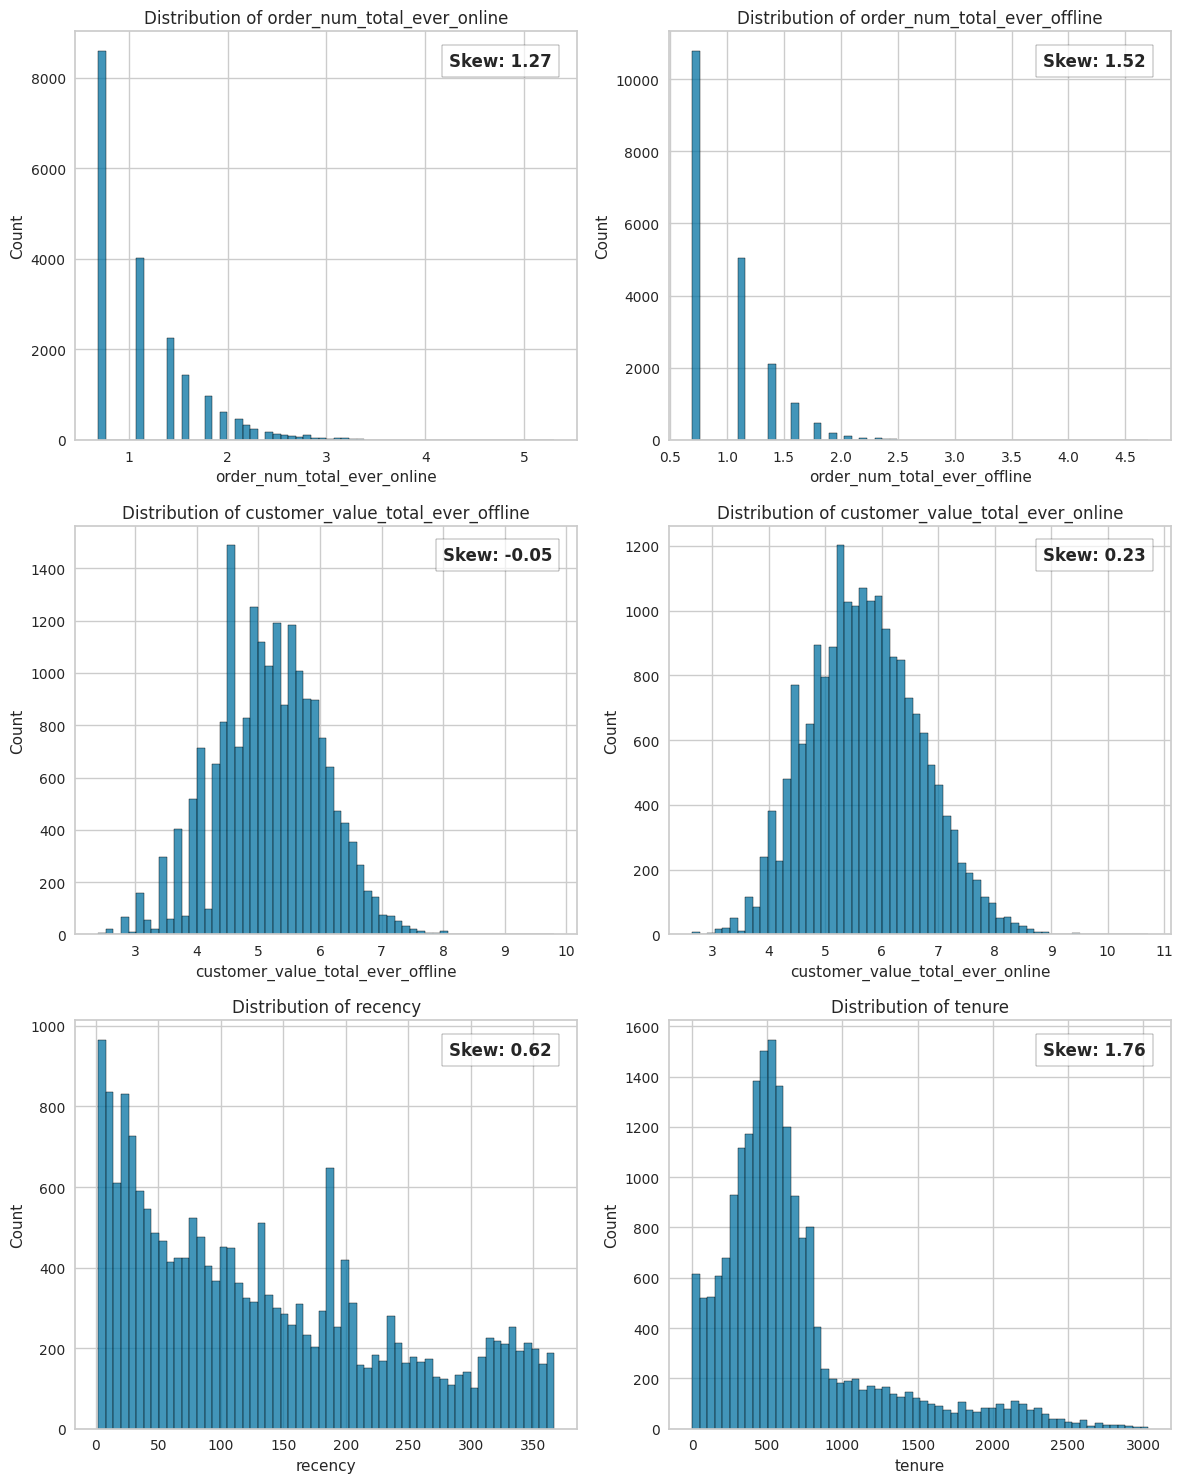

In [17]:
plt.figure(figsize=(12, 15))

for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    check_skew(model_df, column)
    
plt.tight_layout()
plt.show()

### Min-Max Scaler

In [18]:
scaler = MinMaxScaler((0,1))
model_df[num_cols] = scaler.fit_transform(model_df[num_cols])

In [19]:
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.20,0.00,0.34,0.50,0.25,0.04
1,0.50,0.10,0.36,0.60,0.28,0.48
2,0.15,0.10,0.39,0.41,0.50,0.12
3,0.00,0.00,0.18,0.22,0.36,0.00
4,0.00,0.00,0.21,0.30,0.23,0.19


In [20]:
num_cols.append("master_id")
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'recency',
 'tenure',
 'master_id']

> Adding "master_id" columns for last analysis.

#  Customer Segmentation with K-Means

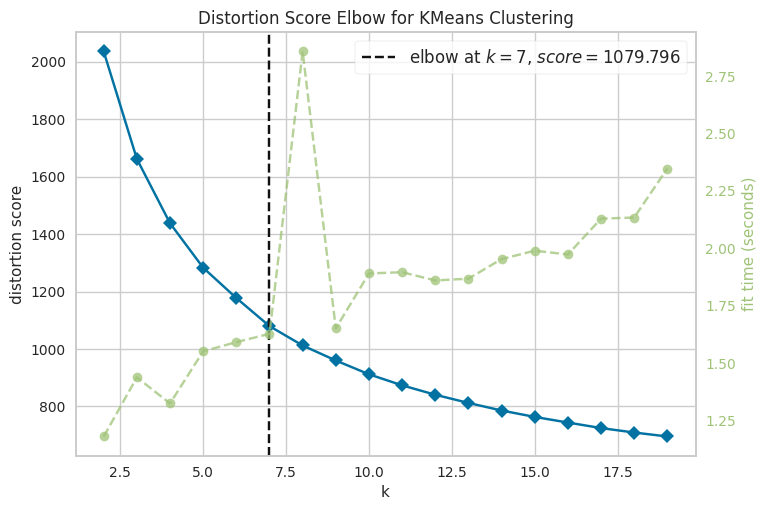

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kmeans = KMeans()

elbow = KElbowVisualizer(kmeans, k=(2, 20))

elbow.fit(model_df)
elbow.show()

In [22]:
elbow.elbow_value_

7

In [23]:
kmeans = KMeans(n_clusters=elbow.elbow_value_,n_init=50).fit(model_df)

clusters_kmeans = kmeans.labels_

In [24]:
kmeans_df = df[num_cols]

kmeans_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,master_id
0,4.00,1.00,139.99,799.38,95,119,cc294636-19f0-11eb-8d74-000d3a38a36f
1,19.00,2.00,159.97,1853.58,105,1469,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
2,3.00,2.00,189.97,395.35,186,366,69b69676-1a40-11ea-941b-000d3a38a36f
3,1.00,1.00,39.99,81.98,135,11,1854e56c-491f-11eb-806e-000d3a38a36f
4,1.00,1.00,49.99,159.99,86,582,d6ea1074-f1f5-11e9-9346-000d3a38a36f


In [25]:
kmeans_df["cluster"] = clusters_kmeans

kmeans_df.groupby("cluster").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                 customer_value_total_ever_online                 recency            tenure                  
                               mean  min    max                         mean  min    max                              mean    min      max                             mean    min      max    mean  min  max    mean   min   max count
cluster                                                                                                                                                                                                                                
0                              8.08 1.00 200.00                         2.12 1.00  24.00                            278.67  12.99  3215.78                          1078.80  19.99 45220.13   73.47    2  202 1967.86  1210  3034  1319
1                              6.63 1.00  69.00                         1.65 1.00  11.00                            207.97  12.99  2575.82                          1199.16 187.95 36687.80   53.38    2  202  676.57     3  1473  2830
2                              1.88 1.00  16.00                         1.73 1.00  87.00                            214.89  10.00  8432.25                           306.82  12.99  7665.28  309.66  239  367  380.00     0  1467  2932
3                              1.44 1.00   5.00                         1.25 1.00   4.00                            148.27  11.98   799.99                           224.08  14.00  1307.33   51.26    2  126  467.82     0  1633  4258
4                              1.91 1.00  13.00                         3.85 1.00 109.00                            571.68 139.97 18119.14                           315.65  14.99  3658.32   64.81    2  224  636.58     0  1916  2747
5                              1.96 1.00  14.00                         1.60 1.00   9.00                            209.53  10.49  1671.41                           329.15  19.99  3616.34  176.77  106  246  443.58     0  1659  4673
6                              5.56 1.00  55.00                         1.94 1.00  16.00                            250.80  12.99  1909.26                           711.32  14.99  7133.14  255.90  152  367 1570.17   542  2820  1186

# Customer Segmentation with Hierarchical Clustering

In [26]:
hc_complete = linkage(model_df, "complete")

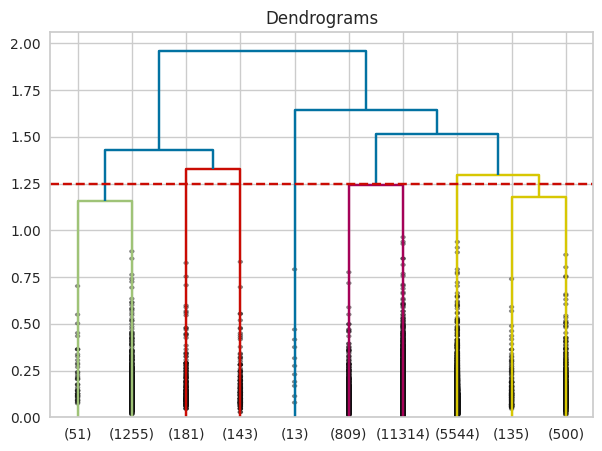

In [27]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=1.25, color='r', linestyle='--')
plt.show()

> According to my observation, 7 clusters are sufficient for this hierarchical cluster analysis.

In [28]:
hc = AgglomerativeClustering(n_clusters=6)
clusters_hc = hc.fit_predict(model_df)

In [29]:
hc_df = df[num_cols]

hc_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,master_id
0,4.00,1.00,139.99,799.38,95,119,cc294636-19f0-11eb-8d74-000d3a38a36f
1,19.00,2.00,159.97,1853.58,105,1469,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
2,3.00,2.00,189.97,395.35,186,366,69b69676-1a40-11ea-941b-000d3a38a36f
3,1.00,1.00,39.99,81.98,135,11,1854e56c-491f-11eb-806e-000d3a38a36f
4,1.00,1.00,49.99,159.99,86,582,d6ea1074-f1f5-11e9-9346-000d3a38a36f


In [30]:
hc_df["cluster"] = clusters_hc

hc_df.groupby("cluster").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                customer_value_total_ever_online                 recency            tenure                 
                               mean  min    max                         mean  min    max                              mean   min      max                             mean    min      max    mean  min  max    mean  min   max count
cluster                                                                                                                                                                                                                              
0                              1.57 1.00  13.00                         2.13 1.00 109.00                            294.66 11.98 18119.14                           260.32  14.00  3658.32   72.86    2  336  476.79    0  1427  7398
1                              6.77 1.00 200.00                         2.32 1.00  24.00                            318.12 12.99  3215.78                           951.30  19.99 45220.13   76.24    2  251 1783.59  633  3034  1688
2                              2.19 1.00  16.00                         1.84 1.00  23.00                            248.94 10.00  3199.62                           376.04  19.99  3625.93  200.25   98  332  453.40    0  1636  3664
3                              6.26 1.00  55.00                         1.85 1.00  16.00                            237.95 12.99  1909.26                           822.46  14.99 12038.18  252.83  105  367 1549.23  472  2872  1194
4                              5.55 1.00  66.00                         1.61 1.00  12.00                            198.17 12.99  2951.46                           969.21 126.97 30688.47   48.56    2  204  680.87    3  1955  3379
5                              1.81 1.00  15.00                         1.55 1.00  13.00                            183.73 10.49  2055.85                           287.06  12.99  7665.28  310.60  199  367  362.50    0  1369  2622